In [3]:
%run resources/library.py

In [4]:
style_notebook()

# Notebook 2: Computing Convex Hulls - Part 1

## Load Cholera data

In [3]:
import pandas as pd

In [4]:
pumps_df = pd.read_csv('data/pumps.csv')

pumps_df

,FID,LON,LAT,Street
0,250,-0.136668,51.513341,Broadwick Street
1,251,-0.139586,51.513876,Kingly Street
2,252,-0.139671,51.514906,Ramillies Place
3,253,-0.131630,51.512354,Dean Street
4,254,-0.133594,51.512139,Rupert Street
5,255,-0.135919,51.511542,Bridle Lane
6,256,-0.133962,51.510019,Regent Street
7,257,-0.138199,51.511295,Warwick Street


In [5]:
deaths_df = pd.read_csv('data/cholera_deaths.csv')

deaths_df

,FID,DEATHS,LON,LAT
0,0,3,-0.137930,51.513418
1,1,2,-0.137883,51.513361
2,2,1,-0.137853,51.513317
3,3,1,-0.137812,51.513262
4,4,4,-0.137767,51.513204
...,...,...,...,...
245,245,3,-0.137108,51.514526
246,246,2,-0.137065,51.514706
247,247,1,-0.138474,51.512311
248,248,1,-0.138123,51.511998


## Prepare data for computing convex hull

In [6]:
import numpy as np

In [7]:
points_pumps = np.array([[lat,lon] for lat,lon in pumps_df[['LAT','LON']].values])

points_pumps

array([[51.513341, -0.136668],
       [51.513876, -0.139586],
       [51.514906, -0.139671],
       [51.512354, -0.13163 ],
       [51.512139, -0.133594],
       [51.511542, -0.135919],
       [51.510019, -0.133962],
       [51.511295, -0.138199]])

In [8]:
points_deaths = np.array([[lat,lon] for lat,lon in deaths_df[['LAT','LON']].values])

points_deaths

array([[51.513418, -0.13793 ],
       [51.513361, -0.137883],
       [51.513317, -0.137853],
       [51.513262, -0.137812],
       [51.513204, -0.137767],
       [51.513184, -0.137537],
       [51.513359, -0.1382  ],
       [51.513328, -0.138045],
       [51.513323, -0.138276],
       [51.513427, -0.138223],
       [51.513381, -0.138337],
       [51.513462, -0.138563],
       [51.513216, -0.138426],
       [51.513169, -0.138378],
       [51.513116, -0.138337],
       [51.51324 , -0.138645],
       [51.513164, -0.138698],
       [51.513178, -0.137924],
       [51.513111, -0.137865],
       [51.513055, -0.137811],
       [51.513441, -0.138762],
       [51.513592, -0.138799],
       [51.513402, -0.139045],
       [51.51338 , -0.13897 ],
       [51.513411, -0.138863],
       [51.513641, -0.138752],
       [51.513693, -0.138808],
       [51.513745, -0.138856],
       [51.513676, -0.138887],
       [51.51359 , -0.139239],
       [51.513663, -0.139321],
       [51.513502, -0.139316],
       [

### Combine all points

In [9]:
points = np.concatenate((points_pumps, points_deaths), axis=0)

points[3,0], points[3,1]

(51.512353999999995, -0.13163)

## Compute Convex Hull

In [10]:
from scipy.spatial import ConvexHull, Voronoi

In [11]:
hull = ConvexHull(points)

hull

In [12]:
hull.vertices

array([  3,   6,   7,  42,   2, 186, 185], dtype=int32)

In [13]:
hull.simplices

array([[  3,   6],
       [  7,   6],
       [  7,  42],
       [  2, 186],
       [  2,  42],
       [185, 186],
       [185,   3]], dtype=int32)

In [14]:
for simplex in hull.simplices:
    print("simplex, indices of points:", simplex)
    print ("points, 0 and 1:", points[simplex,0], points[simplex,1])

simplex, indices of points: [3 6]
points, 0 and 1: [51.512354 51.510019] [-0.13163  -0.133962]
simplex, indices of points: [7 6]
points, 0 and 1: [51.511295 51.510019] [-0.138199 -0.133962]
simplex, indices of points: [ 7 42]
points, 0 and 1: [51.511295 51.513298] [-0.138199 -0.140074]
simplex, indices of points: [  2 186]
points, 0 and 1: [51.514906 51.515834] [-0.139671 -0.134474]
simplex, indices of points: [ 2 42]
points, 0 and 1: [51.514906 51.513298] [-0.139671 -0.140074]
simplex, indices of points: [185 186]
points, 0 and 1: [51.514606 51.515834] [-0.133393 -0.134474]
simplex, indices of points: [185   3]
points, 0 and 1: [51.514606 51.512354] [-0.133393 -0.13163 ]


In [15]:
x=[]
y=[]
for vertex in hull.vertices:
    y.append(points[vertex,0])
    x.append(points[vertex,1])
    
x,y

([-0.13163,
  -0.133962,
  -0.138199,
  -0.140074,
  -0.13967100000000002,
  -0.134474,
  -0.133393],
 [51.512353999999995,
  51.510019,
  51.511295000000004,
  51.513298,
  51.514905999999996,
  51.515834000000005,
  51.514606])

In [16]:
import matplotlib.pyplot as plt

%matplotlib inline

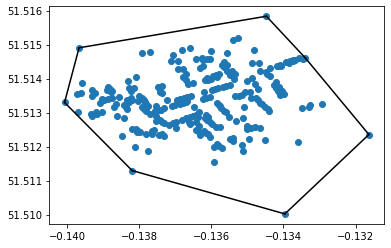

In [17]:
plt.plot(points[:,1], points[:,0], 'o')
for simplex in hull.simplices:
    plt.plot(points[simplex,1], points[simplex,0], 'k-')
    
plt.show()

### Solve for vertices (points) of convex hull

In [18]:
from shapely.geometry import Point, MultiPoint, Polygon

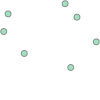

In [19]:
vertex_points = MultiPoint([(points[vertex,1], points[vertex,0]) \
                            for vertex in hull.vertices])

vertex_points

### Convert vertices to a Shapely Polygon and apply `.buffer()` function

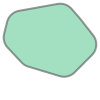

In [20]:
convexhull_poly = Polygon([[p.x,p.y] for p in vertex_points]).buffer(.002)

convexhull_poly

Recall the buffer function we used in isochrone mapping.

### Convert convex hull polygon to Geopandas geodataframe

In [21]:
import geopandas as gpd

In [22]:
crs = {'init': 'epsg:4326'}
convexhull_gdf = gpd.GeoDataFrame(index=[0], crs=crs, geometry=[convexhull_poly])

convexhull_gdf

,geometry
0,"POLYGON ((-0.13006 51.51359, -0.12994 51.51343..."


Recall the CRS function we used for isochrone mapping. 

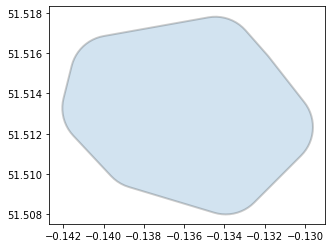

In [23]:
convexhull_gdf.plot(alpha=0.2, edgecolor='black',linewidth=2)

### Save the convex hull polygon

In [24]:
convexhull_gdf.to_file('outputs/convexhull.shp')

convexhull_gdf

,geometry
0,"POLYGON ((-0.13006 51.51359, -0.12994 51.51343..."


### Alternative method to display convex hull

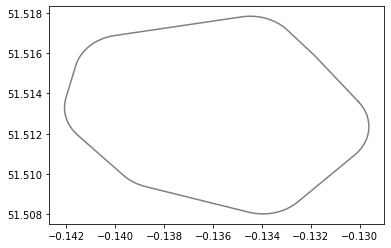

In [25]:
x,y = convexhull_poly.exterior.xy
plt.plot(x,y, color='gray')

## Bring all the plots together

### Plot pumps

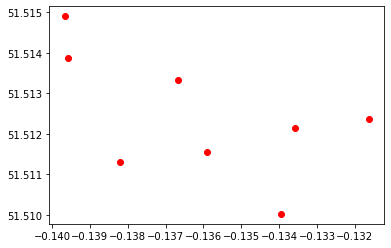

In [26]:
plt.plot(points_pumps[:,1], points_pumps[:,0], 'o', color='red', )

### Plot death locations

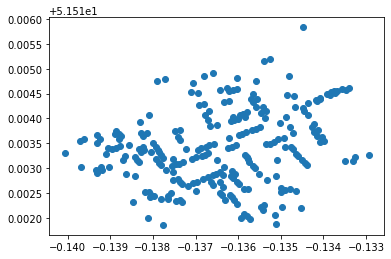

In [27]:
plt.plot(points_deaths[:,1], points_deaths[:,0], 'o')

### Combined plots: Minimum Viable Product

Text(0.5, 1.0, 'Pumps and Deaths with Alpha Shape, Soho District')

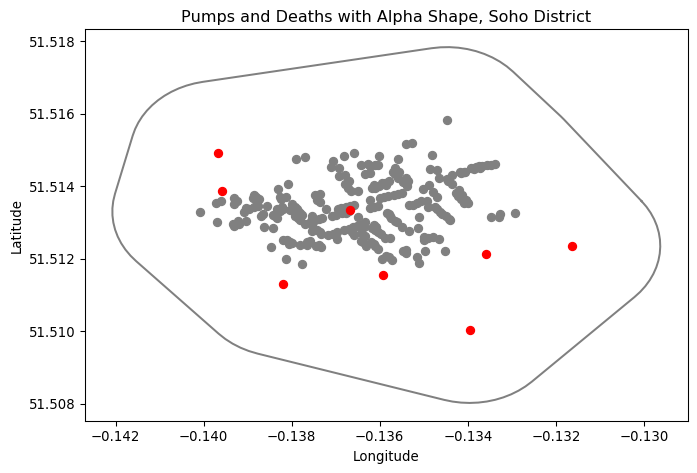

In [28]:
my_dpi=96

fig, ax = plt.subplots(figsize=((432*1.8)/my_dpi, (288*1.8)/my_dpi), dpi=my_dpi)

# plot death locations, color this grey
ax.plot(points_deaths[:,1], points_deaths[:,0], 'o', color='grey')

# plot pump locations, color this red
ax.plot(points_pumps[:,1], points_pumps[:,0], 'o', color='red', )

# plot convex hull polygon
x,y = convexhull_poly.exterior.xy
ax.plot(x,y, color='gray')

# set title and axis labels
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Pumps and Deaths with Alpha Shape, Soho District')

With this Python approach, we know we can use the convex hull to constrain potential infinite vertices when computing Voronoi polygons.

## Alternative Method for Computing Convex Hull - `alphashape`

See Notebook 3 for an alternative method to compute convex hull using the `alphashape` package.

## References

1. Convex Hull Reference: https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.ConvexHull.html
2. Scipy Spatial Tutorial (includes convex hull): https://docs.scipy.org/doc/scipy/reference/tutorial/spatial.html
3. https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.convex_hull_plot_2d.html#scipy.spatial.convex_hull_plot_2d
4. Numpy concatenate arrays: http://lagrange.univ-lyon1.fr/docs/numpy/1.11.0/reference/generated/numpy.concatenate.html